# First preliminary analysis of the same plate cell painting data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import fastcluster  
from sklearn.preprocessing import StandardScaler
import polars as pl

In [ ]:
df_cc = pd.read_csv("../01.dose_response/outputs/df_CC_proba.csv", sep=',')

#df_pred.loc[df_pred['Metadata_plate_map_name'] == 'BR00145695', 'Metadata_source_plate'] = 'Plate1'
#df_pred.loc[df_pred['Metadata_plate_map_name'] != 'BR00145695', 'Metadata_source_plate'] = 'Plate2'

In [29]:
unique_values = sorted(sub_df['Metadata_Count_Cells'].unique())
print(unique_values)

[1716, 1726, 1914, 1957, 1969, 2014, 2124, 2151, 2306, 2348, 2359, 2377, 2490, 2505, 2510, 2569, 2584, 2623, 2665, 2731, 2739, 2792, 2828, 2835, 2845, 2858, 2932, 2956, 2959, 2986, 3028, 3046, 3053, 3062, 3064, 3069, 3112, 3138, 3155, 3206, 3225, 3270, 3277, 3320, 3334, 3335, 3346, 3368, 3383, 3388, 3392, 3407, 3410, 3413, 3436, 3440, 3441, 3455, 3477, 3479, 3497, 3517, 3541, 3547, 3549, 3553, 3558, 3562, 3571, 3574, 3581, 3601, 3604, 3609, 3623, 3624, 3628, 3631, 3634, 3649, 3663, 3669, 3670, 3672, 3673, 3674, 3687, 3703, 3704, 3725, 3743, 3745, 3751, 3754, 3766, 3768, 3779, 3802, 3805, 3806, 3808, 3819, 3821, 3827, 3845, 3850, 3859, 3862, 3874, 3884, 3889, 3895, 3897, 3903, 3910, 3915, 3923, 3926, 3944, 3945, 3952, 3962, 3968, 3983, 3984, 3993, 3997, 3999, 4002, 4008, 4009, 4022, 4026, 4029, 4030, 4031, 4035, 4043, 4049, 4050, 4055, 4058, 4067, 4084, 4085, 4088, 4094, 4104, 4108, 4112, 4120, 4126, 4127, 4128, 4130, 4133, 4135, 4153, 4158, 4159, 4168, 4171, 4184, 4192, 4193, 4196, 419

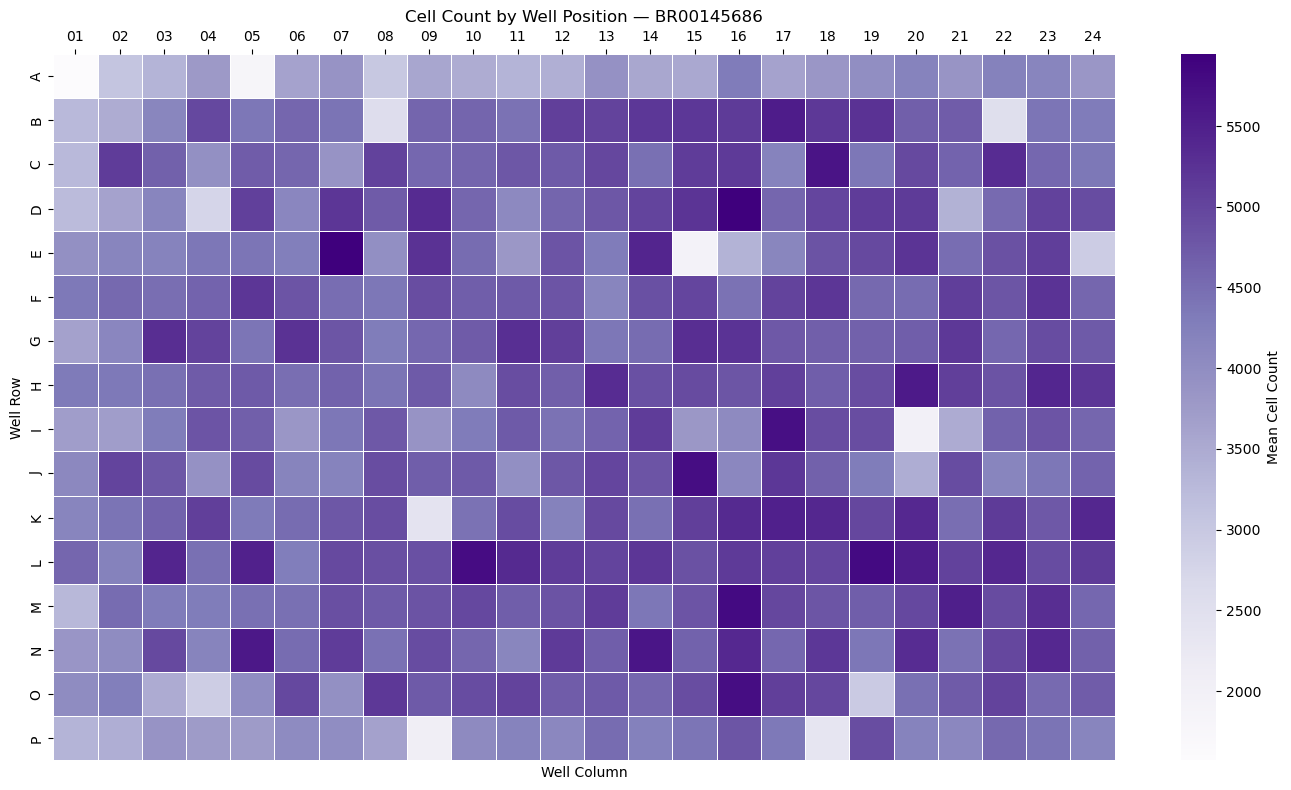

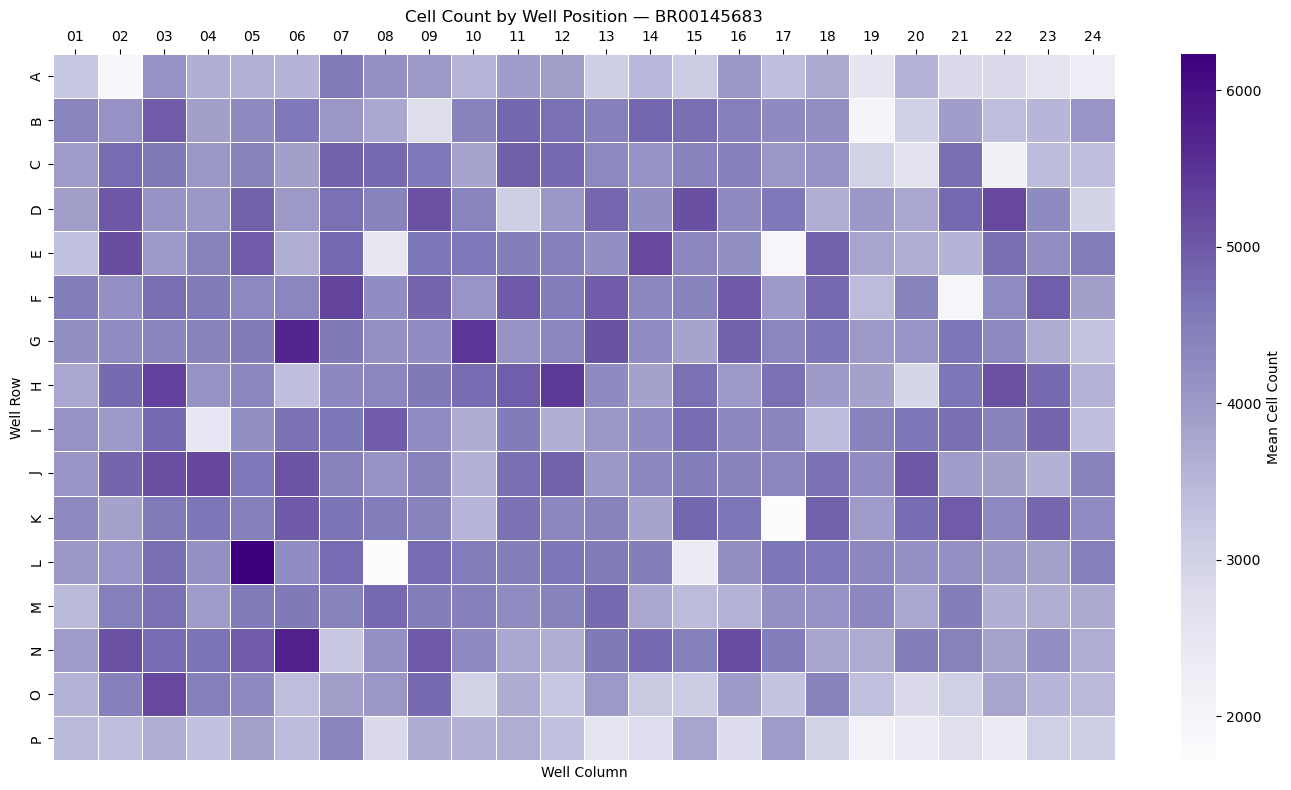

In [28]:
df= df_cc
df["Well_Row"] = df["Metadata_Well"].str.extract(r"([A-P])")
df["Well_Col"] = df["Metadata_Well"].str.extract(r"(\d{2})")

row_order = list("ABCDEFGHIJKLMNOP")

plates = df["Metadata_Plate"].unique()
for plate in plates:
    sub_df = df[df["Metadata_Plate"] == plate]
    heatmap_data = (
                sub_df.groupby(["Well_Row", "Well_Col"])["Metadata_Count_Cells"]
                .mean()
                .unstack()
                .reindex(index=row_order)
            )

    plt.figure(figsize=(14,8))
    sns.heatmap(
        heatmap_data,
        cmap= 'Purples',
        linewidths=0.5,
        linecolor="white",
        cbar_kws={"label": "Mean Cell Count"},
    )
    plt.title(f"Cell Count by Well Position — {plate}")
    plt.xlabel("Well Column")
    plt.ylabel("Well Row")
    plt.gca().xaxis.tick_top()
    plt.tight_layout()
    plt.show()